In [1]:
import sys, os

import numpy as np

import trajectory as T                      # trajectory generation
import optimizer as O                       # stochastic gradient descent optimizer

from maxent import irl

In [2]:
def word_to_state(word):

    verb_positive_words = ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate']
    verb_negative_words = ['complain', 'argue', 'blame', 'grumble', 'snarl']
    verb_inactive_words = ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask']
    verb_active_words = ['smash', 'grab', 'push', 'shout', 'storm']
    adv_time_words = ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly']
    adv_place_words = ['here', 'there', 'everywhere', 'nowhere', 'somewhere']
    adv_interrogative_words = ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively']
    adv_uncertain_words = ['maybe', 'possibly', 'likely', 'arguably', 'presumably']
    adv_certain_words = ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly']
    adj_descriptive_words = ['bright', 'calm', 'colorful', 'peaceful', 'radiant']
    adj_quantitative_words = ['little', 'few', 'some', 'many', 'much']
    noun_soft =  ['feather', 'whisper', 'breeze', 'lullaby', 'velvet', 'serenity', 'meadow', 'bubble', 'petal', 'harmony', 'fawn', 'mist', 'silk', 'cushion', 'fluff', 'hush', 'dew', 'sigh', 'cocoon', 'murmur']
    noun_harsh = ['clash', 'fracture', 'gravel', 'jolt', 'quake', 'blaze', 'torrent', 'shatter', 'thorn', 'crunch', 'screech', 'grit', 'splinter', 'snarl', 'flare', 'rupture', 'smog', 'clash', 'blitz', 'jagged']
    first_person_pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    second_person_pronouns = ['you', 'your', 'yours']
    third_person_pronouns = ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs']
    prepositions = ['in', 'on', 'under', 'over', 'with', 'without']
    determiners = ['the', 'a', 'an', 'this', 'that', 'these', 'those']
    conjuctions = ['because', 'since', 'as', 'so', 'for', 'and', 'but', 'or']
    ponctuation_neutral = ["."]
    ponctuation_emotional = ["!", "?"]



    word_lower = word.lower()


    if word_lower in verb_positive_words:
        return 'Verb_positive'
    elif word_lower in verb_negative_words:
        return 'Verb_negative'
    elif word_lower in verb_inactive_words:
        return 'Verb_inaction'
    elif word_lower in verb_active_words:
        return 'Verb_action'
    elif word_lower in adv_time_words:
        return 'Adverb_time'
    elif word_lower in adv_place_words:
        return 'Adverb_place'
    elif word_lower in adv_interrogative_words:
        return 'Adverb_interrogative'
    elif word_lower in adj_descriptive_words:
        return 'Adj_descriptive'
    elif word_lower in adj_quantitative_words:
        return 'Adj_quantitative'
    elif word_lower in adv_uncertain_words:
        return 'Adverb_uncertain'
    elif word_lower in adv_certain_words:
        return 'Adverb_certain'
    elif word_lower in conjuctions:
        return 'Conjunction'
    elif word_lower in noun_soft:
        return 'Noun_soft'
    elif word_lower in noun_harsh:
        return 'Noun_harsh'
    elif word_lower in first_person_pronouns:
        return 'P_1st'
    elif word_lower in second_person_pronouns:
        return 'P_2nd'
    elif word_lower in third_person_pronouns:
        return 'P_3rd'
    elif word_lower in prepositions:
        return 'Prep'
    elif word_lower in determiners:
        return 'Det'
    elif word_lower in ponctuation_neutral:
      return 'Ponct_n'
    elif word_lower in ponctuation_emotional:
      return 'Ponct_e'

    else:
        assert False, "Unknown category for the provided word."
        return 'Unknown'




In [3]:
states =  ['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction',
 ]



states_one_hot = np.zeros((len(states), len(states)))

one_hot_encoding_dic = {state: [0] * len(states) for state in states}

state_number_dic = {state: 0  for state in states}


# Set the corresponding index to 1 for each state
for i, state in enumerate(states):
    one_hot_encoding_dic[state][i] = 1
    state_number_dic[state] = i
    states_one_hot[i, i] = 1



In [4]:
from typing import Dict, List, Union
import random

class CFG_1:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:


        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.9), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.4, 0.5), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.1, 0.4, 0.4), k=1)[0]
            elif symbol=="Ponctuation":
                production = random.choices(self.rules[symbol], weights=(0.25, 0.75), k=1)[0]
            elif symbol=="Pronoun":
                production = random.choices(self.rules[symbol], weights=(0.7, 0.2, 0.1), k=1)[0]
            elif symbol=="Noun":
                production = random.choices(self.rules[symbol], weights=(0.8, 0.2), k=1)[0]
            elif symbol=="Verb":
                production = random.choices(self.rules[symbol], weights=(0.4, 0.1, 0.1, 0.4), k=1)[0]
            elif symbol=="Adj":
                production = random.choices(self.rules[symbol], weights=(0.8, 0.2), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol


In [5]:
class CFG_2:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:


        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.9, 0.1), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.7, 0.3, 0), k=1)[0]
            elif symbol=="VP":
                production = random.choices(self.rules[symbol], weights=(1.0, 0), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.4, 0.4, 0.1, 0.1), k=1)[0]
            elif symbol=="Ponctuation":
                production = random.choices(self.rules[symbol], weights=(0.75, 0.25), k=1)[0]
            elif symbol=="Pronoun":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.2, 0.7), k=1)[0]
            elif symbol=="Noun":
                production = random.choices(self.rules[symbol], weights=(0.2, 0.8), k=1)[0]
            elif symbol=="Verb":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.4, 0.4, 0.1), k=1)[0]
            elif symbol=="Adj":
                production = random.choices(self.rules[symbol], weights=(0.2, 0.8), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol

In [6]:
cfg_rules = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Noun": [["Noun_soft"], ["Noun_harsh"]],
    "Adj": [["Adj_descriptive"], ["Adj_quantitative"]],
    "Pronoun": [["P_1st"], ["P_2nd"], ["P_3rd"]],
    "Verb": [["Verb_positive"], ["Verb_negative"], ["Verb_action"], ["Verb_inaction"]],
    "Adverb": [["Adverb_time"], ["Adverb_place"], ["Adverb_interrogative"], ["Adverb_certain"], ["Adverb_uncertain"]],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
    "Ponctuation": [["Ponct_n"], ["Ponct_e"]]


}

terminal_words = {
    "Verb_positive": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate'],
    "Verb_negative": ['complain', 'argue', 'blame', 'grumble', 'snarl'],
    "Verb_action": ['smash', 'grab', 'push', 'shout', 'storm'],
    "Verb_inaction": ['rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb_time": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly'],
    "Adverb_place": ['here', 'there', 'everywhere', 'nowhere', 'somewhere'],
    "Adverb_interrogative": ['curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively'],
    "Adj_descriptive": ['bright', 'calm',  'colorful', 'peaceful', 'radiant'],
    "Adj_quantitative": ['little', 'few', 'some', 'many', 'much'],
    "Adverb_certain": ['definitely', 'surely', 'clearly', 'obviously', 'undoubtedly'],
    "Adverb_uncertain": ['maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    #"Noun_simple": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain'],
    "Noun_soft": ["Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal", "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur"],
    "Noun_harsh" : [ "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",  "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "P_1st": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours'],
    "P_2nd": ['you', 'your', 'yours'],
    "P_3rd": ['he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponct_n": ['.'],
    "Ponct_e": ['?', '!']

}

In [7]:
# positive sentences
cfg = CFG_1(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence

'This calm murmur complain arguably over an radiant harmony maybe so mine illuminates nowhere !'

In [8]:
# negative sentences
cfg = CFG_2(cfg_rules, terminal_words)

sentence = cfg.generate("Sentence")
sentence

'Hers grumble .'

In [9]:
cfg = CFG_1(cfg_rules, terminal_words)


pos_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  pos_sentences.append(sentence)

In [10]:
cfg = CFG_2(cfg_rules, terminal_words)


neg_sentences = []


for _ in range(50):

  sentence = cfg.generate("Sentence")
  neg_sentences.append(sentence)

In [11]:
pos_sentences

['Those velvet grab wonderingly over the colorful meadow obviously for the peaceful gravel bask under the colorful breeze questioningly !',
 'Sigh push that some meadow since velvet thrive presumably in this velvet !',
 'An cocoon illuminates as fluff rest eventually on the clash !',
 'Dew complain in those petal but those sigh soar shortly those petal here ?',
 'These fluff grumble clearly those radiant harmony and a breeze hover that peaceful clash !',
 'Smog laze under this radiant fluff or cocoon hovers under that bright lullaby surely .',
 'That few clash hover clearly under these gravel pensively as bubble laze over that gravel definitely .',
 'This velvet pause under the snarl nowhere because we hovers curiously without these harmony .',
 'Ours pause for that dew push obviously these grit gradually ?',
 'This petal snarl shortly with a much feather since silk hover under those colorful petal .',
 'Sigh laze here with these colorful breeze because this dew snarl ?',
 'Those peace

In [12]:
neg_sentences

['He blame .',
 'It illuminates with an little torrent .',
 'Those petal sparkle without these much hush but an blaze grumble .',
 'This fluff shout !',
 'Flare grab .',
 'These rupture argue .',
 'An many torrent complain .',
 'Yours argue !',
 'Blaze blame a clash .',
 'That some clash grab .',
 'A few crunch soar !',
 'Smog snarl .',
 'Yours grumble .',
 'Its blame these some snarl .',
 'These few breeze argue ?',
 'A flare blame these radiant clash .',
 'Fracture grab .',
 'These jagged shout .',
 'That flare hover .',
 'Their push !',
 'That blitz grumble that grit !',
 'Jolt thrive .',
 'This colorful blitz grab an fracture or an blaze shout ?',
 'Serenity snarl an flare .',
 'Blaze blame an petal .',
 'It push ?',
 'Those grit grumble !',
 'An peaceful cushion shout this crunch ?',
 'We grab .',
 'This shatter push ?',
 'This few quake grumble .',
 'Screech complain .',
 'Clash sparkle or a torrent soar .',
 'An some grit soars the gravel ?',
 'Those peaceful torrent illuminate 

In [13]:
for i in range(len(pos_sentences)):
  pos_sentences[i] = pos_sentences[i].split()

for i in range(len(neg_sentences)):
  neg_sentences[i] = neg_sentences[i].split()




In [14]:
pos_sentences

[['Those',
  'velvet',
  'grab',
  'wonderingly',
  'over',
  'the',
  'colorful',
  'meadow',
  'obviously',
  'for',
  'the',
  'peaceful',
  'gravel',
  'bask',
  'under',
  'the',
  'colorful',
  'breeze',
  'questioningly',
  '!'],
 ['Sigh',
  'push',
  'that',
  'some',
  'meadow',
  'since',
  'velvet',
  'thrive',
  'presumably',
  'in',
  'this',
  'velvet',
  '!'],
 ['An',
  'cocoon',
  'illuminates',
  'as',
  'fluff',
  'rest',
  'eventually',
  'on',
  'the',
  'clash',
  '!'],
 ['Dew',
  'complain',
  'in',
  'those',
  'petal',
  'but',
  'those',
  'sigh',
  'soar',
  'shortly',
  'those',
  'petal',
  'here',
  '?'],
 ['These',
  'fluff',
  'grumble',
  'clearly',
  'those',
  'radiant',
  'harmony',
  'and',
  'a',
  'breeze',
  'hover',
  'that',
  'peaceful',
  'clash',
  '!'],
 ['Smog',
  'laze',
  'under',
  'this',
  'radiant',
  'fluff',
  'or',
  'cocoon',
  'hovers',
  'under',
  'that',
  'bright',
  'lullaby',
  'surely',
  '.'],
 ['That',
  'few',
  'clash'

In [15]:
neg_sentences

[['He', 'blame', '.'],
 ['It', 'illuminates', 'with', 'an', 'little', 'torrent', '.'],
 ['Those',
  'petal',
  'sparkle',
  'without',
  'these',
  'much',
  'hush',
  'but',
  'an',
  'blaze',
  'grumble',
  '.'],
 ['This', 'fluff', 'shout', '!'],
 ['Flare', 'grab', '.'],
 ['These', 'rupture', 'argue', '.'],
 ['An', 'many', 'torrent', 'complain', '.'],
 ['Yours', 'argue', '!'],
 ['Blaze', 'blame', 'a', 'clash', '.'],
 ['That', 'some', 'clash', 'grab', '.'],
 ['A', 'few', 'crunch', 'soar', '!'],
 ['Smog', 'snarl', '.'],
 ['Yours', 'grumble', '.'],
 ['Its', 'blame', 'these', 'some', 'snarl', '.'],
 ['These', 'few', 'breeze', 'argue', '?'],
 ['A', 'flare', 'blame', 'these', 'radiant', 'clash', '.'],
 ['Fracture', 'grab', '.'],
 ['These', 'jagged', 'shout', '.'],
 ['That', 'flare', 'hover', '.'],
 ['Their', 'push', '!'],
 ['That', 'blitz', 'grumble', 'that', 'grit', '!'],
 ['Jolt', 'thrive', '.'],
 ['This',
  'colorful',
  'blitz',
  'grab',
  'an',
  'fracture',
  'or',
  'an',
  'blaze'

In [16]:
D_pos= []

for i, sentence in enumerate(pos_sentences):

  episode_pos = []

  for j, word in enumerate(sentence[:-1]):


    s = np.argmax(one_hot_encoding_dic[word_to_state(word)] )
    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j+1])] )
    episode_pos.append((s, a, a))


  D_pos.append(T.Trajectory(episode_pos))



D_neg= []

for i, sentence in enumerate(neg_sentences):

  episode_neg = []

  for j, word in enumerate(sentence[:-1]):

    s = np.argmax(one_hot_encoding_dic[word_to_state(word)] )
    a = np.argmax(one_hot_encoding_dic[word_to_state(sentence[j+1])] )
    episode_neg.append((s, a, a))

  D_neg.append(T.Trajectory(episode_neg))

In [17]:
D_pos

[Trajectory([(19, 12, 12), (12, 2, 2), (2, 6, 6), (6, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 9, 9), (9, 20, 20), (20, 19, 19), (19, 7, 7), (7, 11, 11), (11, 3, 3), (3, 18, 18), (18, 19, 19), (19, 7, 7), (7, 12, 12), (12, 6, 6), (6, 14, 14)]),
 Trajectory([(12, 2, 2), (2, 19, 19), (19, 8, 8), (8, 12, 12), (12, 20, 20), (20, 12, 12), (12, 0, 0), (0, 10, 10), (10, 18, 18), (18, 19, 19), (19, 12, 12), (12, 14, 14)]),
 Trajectory([(19, 12, 12), (12, 0, 0), (0, 20, 20), (20, 12, 12), (12, 3, 3), (3, 4, 4), (4, 18, 18), (18, 19, 19), (19, 11, 11), (11, 14, 14)]),
 Trajectory([(12, 1, 1), (1, 18, 18), (18, 19, 19), (19, 12, 12), (12, 20, 20), (20, 19, 19), (19, 12, 12), (12, 0, 0), (0, 4, 4), (4, 19, 19), (19, 12, 12), (12, 5, 5), (5, 14, 14)]),
 Trajectory([(19, 12, 12), (12, 1, 1), (1, 9, 9), (9, 19, 19), (19, 7, 7), (7, 12, 12), (12, 20, 20), (20, 19, 19), (19, 12, 12), (12, 3, 3), (3, 19, 19), (19, 7, 7), (7, 11, 11), (11, 14, 14)]),
 Trajectory([(11, 3, 3), (3, 18, 18), (18,

In [18]:
D_neg

[Trajectory([(17, 1, 1), (1, 13, 13)]),
 Trajectory([(17, 0, 0), (0, 18, 18), (18, 19, 19), (19, 8, 8), (8, 11, 11), (11, 13, 13)]),
 Trajectory([(19, 12, 12), (12, 0, 0), (0, 18, 18), (18, 19, 19), (19, 8, 8), (8, 12, 12), (12, 20, 20), (20, 19, 19), (19, 11, 11), (11, 1, 1), (1, 13, 13)]),
 Trajectory([(19, 12, 12), (12, 2, 2), (2, 14, 14)]),
 Trajectory([(11, 2, 2), (2, 13, 13)]),
 Trajectory([(19, 11, 11), (11, 1, 1), (1, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 11, 11), (11, 1, 1), (1, 13, 13)]),
 Trajectory([(16, 1, 1), (1, 14, 14)]),
 Trajectory([(11, 1, 1), (1, 19, 19), (19, 11, 11), (11, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 11, 11), (11, 2, 2), (2, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 11, 11), (11, 0, 0), (0, 14, 14)]),
 Trajectory([(11, 1, 1), (1, 13, 13)]),
 Trajectory([(16, 1, 1), (1, 13, 13)]),
 Trajectory([(17, 1, 1), (1, 19, 19), (19, 8, 8), (8, 1, 1), (1, 13, 13)]),
 Trajectory([(19, 8, 8), (8, 12, 12), (12, 1, 1), (1, 14, 14)]),
 Trajectory([(19, 11, 11), (11, 1, 

In [19]:
states_one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [20]:
terminal_pos = []

for traj in D_pos:
  terminal_pos.append(traj._t[-1][-1])

terminal_pos = list(set(terminal_pos))

In [21]:
terminal_neg = []

for traj in D_neg:
  terminal_neg.append(traj._t[-1][-1])

terminal_neg = list(set(terminal_neg))

In [22]:
terminal_pos

[13, 14]

In [23]:
terminal_neg

[13, 14]

In [24]:
state_number_dic

{'Verb_positive': 0,
 'Verb_negative': 1,
 'Verb_action': 2,
 'Verb_inaction': 3,
 'Adverb_time': 4,
 'Adverb_place': 5,
 'Adverb_interrogative': 6,
 'Adj_descriptive': 7,
 'Adj_quantitative': 8,
 'Adverb_certain': 9,
 'Adverb_uncertain': 10,
 'Noun_harsh': 11,
 'Noun_soft': 12,
 'Ponct_n': 13,
 'Ponct_e': 14,
 'P_1st': 15,
 'P_2nd': 16,
 'P_3rd': 17,
 'Prep': 18,
 'Det': 19,
 'Conjunction': 20}

In [25]:
states

['Verb_positive',
 'Verb_negative',
 'Verb_action',
 'Verb_inaction',
 'Adverb_time',
 'Adverb_place',
 'Adverb_interrogative',
 'Adj_descriptive',
 'Adj_quantitative',
 'Adverb_certain',
 'Adverb_uncertain',
 'Noun_harsh',
 'Noun_soft',
 'Ponct_n',
 'Ponct_e',
 'P_1st',
 'P_2nd',
 'P_3rd',
 'Prep',
 'Det',
 'Conjunction']

In [26]:
num_state = states_one_hot.shape[0]

transition = np.zeros((len(states), len(states), len(states)))

for i in range(num_state):
    transition[:, i, i] = 1

transition.shape

(21, 21, 21)

In [27]:
init_pos = O.Constant(1.0)
optim_pos = O.ExpSga(lr=O.linear_decay(lr0=0.1))


init_neg = O.Constant(1.0)
optim_neg = O.ExpSga(lr=O.linear_decay(lr0=0.1))


reward_maxent_pos = irl(transition, states_one_hot, terminal_pos, D_pos, optim_pos, init_pos)
reward_maxent_neg = irl(transition, states_one_hot, terminal_neg, D_neg, optim_neg, init_neg)

In [28]:
reward_maxent_pos

array([1.09184047, 0.85009163, 0.86106956, 1.244371  , 0.95308593,
       0.96511509, 0.90614265, 1.39387048, 0.85009163, 0.96511509,
       0.87216331, 1.02702059, 2.45955175, 0.88337322, 1.13211023,
       0.78663368, 0.75643194, 0.74658725, 1.64929741, 2.31365731,
       1.31793383])

In [29]:
reward_maxent_neg

array([0.83889397, 1.01136899, 0.90670064, 0.78425794, 0.75811577,
       0.75811577, 0.75811577, 0.81117995, 0.87709714, 0.75811577,
       0.75811577, 1.09017843, 0.83889397, 1.06719494, 0.93712872,
       0.75811577, 0.75811577, 0.75811577, 0.77545786, 0.92689396,
       0.78425794])

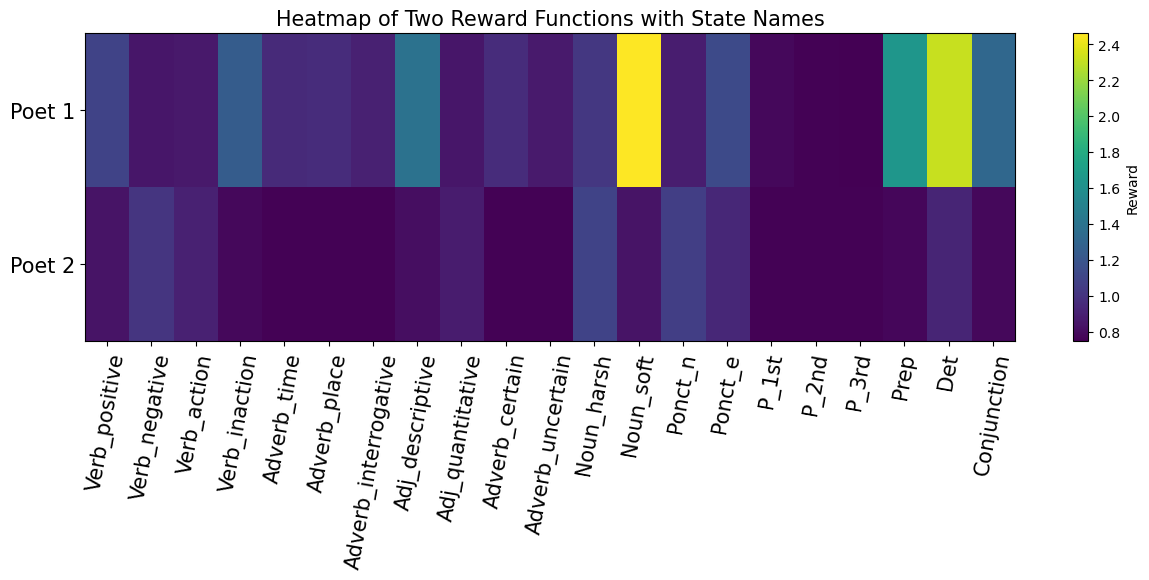

In [30]:
import matplotlib.pyplot as plt


size_text = 15


# Example list of state names (replace with your actual list of state names)
state_names = states

rewards = np.array([reward_maxent_pos, reward_maxent_neg])


# Creating the heatmap
plt.figure(figsize=(15, 4))  # Adjusted figure size for better readability
plt.imshow(rewards, cmap='viridis', aspect='auto')
plt.colorbar(label='Reward')

# Adding labels and title
plt.title('Heatmap of Two Reward Functions with State Names', fontsize = size_text)
# plt.xlabel('States', fontsize = size_text)
# plt.ylabel('Reward Function', fontsize = size_text)
plt.yticks([0, 1], ['Poet 1', 'Poet 2'], fontsize = size_text)
plt.xticks(np.arange(len(states)), labels=state_names, rotation=80, fontsize = size_text)  # Rotate for readability

plt.show()



# Non-enriched CFG 

In [31]:
def word_to_state_ne(word):

    verb = ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate', 
             'complain', 'argue', 'blame', 'grumble', 'snarl', 'smash', 'grab', 'push', 'shout', 'storm',
            'rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask']
    adverb = ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly',
              'here', 'there', 'everywhere', 'nowhere', 'somewhere',
              'curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively',
              'definitely', 'surely', 'clearly', 'obviously', 'undoubtedly', 'maybe', 'possibly', 'likely', 'arguably', 'presumably']
    adj = ['bright', 'calm',  'colorful', 'peaceful', 'radiant', 'little', 'few', 'some', 'many', 'much']
    noun = ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain',
            "feather", "whisper", "breeze", "lullaby", "velvet", "serenity", "meadow", "bubble", "petal",
            "harmony",  "fawn", "mist", "silk", "cushion", "fluff", "hush", "dew", "sigh", "cocoon", "murmur",
            "clash", "fracture", "gravel", "jolt", "quake",  "blaze", "torrent", "shatter", "thorn", "crunch",
            "screech", "grit", "splinter", "snarl", "flare",  "rupture", "smog", "clash", "blitz", "jagged"]
    pronoun = ['i', 'me', 'mine', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 
               'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs']
    ponctuation = ['.', '?', '!']
    prepositions = ['in', 'on', 'under', 'over', 'with', 'without']
    determiners = ['the', 'a', 'an', 'this', 'that', 'these', 'those']
    conjuctions = ['because', 'since', 'as', 'so', 'for', 'and', 'but', 'or']


    word_lower = word.lower()


    if word_lower in verb:
        return 'Verb'
    elif word_lower in adverb:
        return 'Adverb'
    elif word_lower in adj:
        return 'Adj'
    elif word_lower in conjuctions:
        return 'Conjunction'
    elif word_lower in noun:
        return 'Noun'
    elif word_lower in pronoun:
        return 'Pronoun'
    elif word_lower in prepositions:
        return 'Prep'
    elif word_lower in determiners:
        return 'Det'
    elif word_lower in ponctuation:
      return 'Ponctuation'

    else:
        assert False, "Unknown category for the provided word."
        return 'Unknown'




In [32]:
states_ne =  ['Verb',
 'Adverb',
 'Adj',
 'Noun',
 'Ponctuation',
 'Pronoun',
 'Prep',
 'Det',
 'Conjunction',
 ]

states_one_hot_ne = np.zeros((len(states_ne), len(states_ne)))

one_hot_encoding_dic_ne = {state: [0] * len(states_ne) for state in states_ne}

state_number_dic_ne = {state: 0  for state in states_ne}


# Set the corresponding index to 1 for each state
for i, state in enumerate(states_ne):
    one_hot_encoding_dic_ne[state][i] = 1
    state_number_dic_ne[state] = i
    states_one_hot_ne[i, i] = 1

In [33]:
one_hot_encoding_dic_ne

{'Verb': [1, 0, 0, 0, 0, 0, 0, 0, 0],
 'Adverb': [0, 1, 0, 0, 0, 0, 0, 0, 0],
 'Adj': [0, 0, 1, 0, 0, 0, 0, 0, 0],
 'Noun': [0, 0, 0, 1, 0, 0, 0, 0, 0],
 'Ponctuation': [0, 0, 0, 0, 1, 0, 0, 0, 0],
 'Pronoun': [0, 0, 0, 0, 0, 1, 0, 0, 0],
 'Prep': [0, 0, 0, 0, 0, 0, 1, 0, 0],
 'Det': [0, 0, 0, 0, 0, 0, 0, 1, 0],
 'Conjunction': [0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [34]:
class CFG_1_non_enriched:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:

        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.9), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.4, 0.5), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.1, 0.1, 0.4, 0.4), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol

In [35]:
class CFG_2_non_enriched:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:

        production_prev = []

        if symbol in self.rules:
            
            if symbol=="Sentence":
                production = random.choices(self.rules[symbol], weights=(0.9, 0.1), k=1)[0]
            elif symbol=="Simple_1" or symbol=="Simple_2":
                production = random.choices(self.rules[symbol], weights=(0.5, 0.4, 0.1), k=1)[0]
            elif symbol=="Object":
                production = random.choices(self.rules[symbol], weights=(0.4, 0.4, 0.1, 0.1), k=1)[0]

            else:
                production = random.choice(self.rules[symbol])
                
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol

In [36]:
class CFG_non_enriched_no_weights:
    def __init__(self, rules: Dict[str, List[Union[str, List[str]]]], terminals: Dict[str, List[str]]):
        self.rules = rules
        self.terminals = terminals

    def generate(self, symbol: str) -> str:

        production_prev = []

        if symbol in self.rules:
            
            production = random.choice(self.rules[symbol])
            return ' '.join(self.generate(sym) for sym in production).capitalize()
            
        elif symbol in self.terminals:
            return random.choice(self.terminals[symbol])
        else:
            return symbol

In [37]:
cfg_rules_ne = {
    "Sentence": [["Simple_2"], ["Compound"]],
    "Compound": [["Simple_1", "Conjunction", "Simple_2"]],
    "Simple_1": [
        ["Sub", "VP"],
        ["Sub", "VP", "Object"],
        ["Sub", "VP", "Object", "Adverb"]
    ],

    "Simple_2": [
        ["Sub", "VP", "Ponctuation"],
        ["Sub", "VP", "Object", "Ponctuation"],
        ["Sub", "VP", "Object", "Adverb", "Ponctuation"]
    ],
    "Sub": [["Pronoun"], ["Noun"], ["Det", "Noun"], ["Det", "Adj", "Noun"]],
    "VP": [["Verb"], ["Verb", "Adverb"]],
    "Object": [
        ["Det", "Noun"],
        ["Det", "Adj", "Noun"],
        ["Prep", "Det", "Noun"],
        ["Prep", "Det", "Adj", "Noun"]
    ],
    "Conjunction": [['because'], ['since'], ['as'], ['so'], ['for'], ['and'], ['but'], ['or']],
    "Det": [["the"], ["a"], ["an"], ["this"], ["that"], ["these"], ["those"]],
    "Prep": [["in"], ["on"], ["under"], ["over"], ["with"], ["without"]],
}

terminal_words_ne = {
    "Verb": ['bloom', 'soar', 'soars', 'sparkle', 'thrive', 'illuminates', 'illuminate', 
             'complain', 'argue', 'blame', 'grumble', 'snarl', 'smash', 'grab', 'push', 'shout', 'storm',
            'rest', 'pause', 'hovers', 'hover', 'lazes', 'laze', 'bask'],
    "Adverb": ['suddenly', 'gradually', 'eventually', 'shortly', 'instantly',
              'here', 'there', 'everywhere', 'nowhere', 'somewhere',
              'curiously', 'wonderingly', 'questioningly', 'doubtfully', 'pensively',
              'definitely', 'surely', 'clearly', 'obviously', 'undoubtedly', 'maybe', 'possibly', 'likely', 'arguably', 'presumably'],
    "Adj": ['bright', 'calm',  'colorful', 'peaceful', 'radiant', 'little', 'few', 'some', 'many', 'much'],
    "Noun": ['car', 'house', 'job', 'money', 'phone', 'discord', 'blight', 'accident', 'damage', 'pain',
            "Feather", "Whisper", "Breeze", "Lullaby", "Velvet", "Serenity", "Meadow", "Bubble", "Petal",
            "Harmony",  "Fawn", "Mist", "Silk", "Cushion", "Fluff", "Hush", "Dew", "Sigh", "Cocoon", "Murmur",
            "Clash", "Fracture", "Gravel", "Jolt", "Quake",  "Blaze", "Torrent", "Shatter", "Thorn", "Crunch",
            "Screech", "Grit", "Splinter", "Snarl", "Flare",  "Rupture", "Smog", "Clash", "Blitz", "Jagged"],
    "Pronoun": ['i', 'me', 'mine', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 
               'he', 'him', 'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'theirs'],
    "Ponctuation": ['.', '?', '!'],
}

In [38]:
# positive sentences
cfg_1_ne = CFG_1_non_enriched(cfg_rules_ne, terminal_words_ne)

sentence = cfg_1_ne.generate("Sentence")
sentence

'She soars on an pain so these blitz grumble with that calm feather surely !'

In [39]:
pos_sentences_ne = []

for _ in range(50):
  sentence = cfg_1_ne.generate("Sentence")
  pos_sentences_ne.append(sentence)

In [40]:
# negative sentences
cfg_2_ne = CFG_2_non_enriched(cfg_rules_ne, terminal_words_ne)

sentence = cfg_2_ne.generate("Sentence")
sentence

'Its sparkle definitely those flare ?'

In [41]:
neg_sentences_ne = []

for _ in range(50):
  sentence = cfg_2_ne.generate("Sentence")
  neg_sentences_ne.append(sentence)

In [42]:
# mixed sentences (no weights)
cfg_ne = CFG_non_enriched_no_weights(cfg_rules_ne, terminal_words_ne)

sentence = cfg_ne.generate("Sentence")
sentence

'Ours shout possibly in this petal arguably but discord pause in this shatter !'

In [43]:
mixed_sentences_ne = []

for _ in range(50):
  sentence = cfg_ne.generate("Sentence")
  mixed_sentences_ne.append(sentence)

In [44]:
for i in range(len(pos_sentences_ne)):
  pos_sentences_ne[i] = pos_sentences_ne[i].split()

for i in range(len(neg_sentences_ne)):
  neg_sentences_ne[i] = neg_sentences_ne[i].split()

for i in range(len(mixed_sentences_ne)):
  mixed_sentences_ne[i] = mixed_sentences_ne[i].split()

In [45]:
pos_sentences_ne

[['This',
  'snarl',
  'lazes',
  'definitely',
  'without',
  'a',
  'calm',
  'pain',
  'doubtfully',
  'since',
  'an',
  'peaceful',
  'gravel',
  'storm',
  'without',
  'a',
  'few',
  'breeze',
  'possibly',
  '!'],
 ['Fracture', 'illuminates', '.'],
 ['This',
  'torrent',
  'rest',
  'over',
  'those',
  'many',
  'dew',
  'for',
  'he',
  'rest',
  'over',
  'a',
  'little',
  'bubble',
  'doubtfully',
  '!'],
 ['An',
  'radiant',
  'fawn',
  'push',
  'in',
  'a',
  'many',
  'silk',
  'as',
  'theirs',
  'lazes',
  'likely',
  'those',
  'some',
  'clash',
  '?'],
 ['Crunch',
  'storm',
  'there',
  'over',
  'the',
  'few',
  'car',
  'eventually',
  'but',
  'an',
  'fluff',
  'blame',
  'questioningly',
  'over',
  'an',
  'discord',
  '!'],
 ['An',
  'radiant',
  'jolt',
  'complain',
  'nowhere',
  'with',
  'these',
  'cushion',
  'here',
  'because',
  'these',
  'bright',
  'phone',
  'hover',
  'a',
  'some',
  'phone',
  '.'],
 ['A',
  'some',
  'discord',
  'hover

In [46]:
D_pos_ne= []

for i, sentence in enumerate(pos_sentences_ne):

  episode_pos = []

  for j, word in enumerate(sentence[:-1]):
    s = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(word)] )
    a = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(sentence[j+1])] )
    episode_pos.append((s, a, a))
    
  D_pos_ne.append(T.Trajectory(episode_pos))


D_neg_ne= []

for i, sentence in enumerate(neg_sentences_ne):

  episode_neg = []

  for j, word in enumerate(sentence[:-1]):
    s = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(word)] )
    a = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(sentence[j+1])] )
    episode_neg.append((s, a, a))

  D_neg_ne.append(T.Trajectory(episode_neg))


D_ne= []

for i, sentence in enumerate(mixed_sentences_ne):

  episode_mixed = []

  for j, word in enumerate(sentence[:-1]):

    s = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(word)] )
    a = np.argmax(one_hot_encoding_dic_ne[word_to_state_ne(sentence[j+1])] )
    episode_mixed.append((s, a, a))

  D_ne.append(T.Trajectory(episode_mixed))

In [47]:
terminal_pos_ne = []

for traj in D_pos_ne:
  terminal_pos_ne.append(traj._t[-1][-1])

terminal_pos_ne = list(set(terminal_pos_ne))

In [48]:
terminal_neg_ne = []

for traj in D_neg_ne:
  terminal_neg_ne.append(traj._t[-1][-1])

terminal_neg_ne = list(set(terminal_neg_ne))

In [49]:
terminal_ne = []

for traj in D_ne:
  terminal_ne.append(traj._t[-1][-1])

terminal_ne = list(set(terminal_ne))

In [50]:
terminal_pos_ne

[4]

In [51]:
terminal_neg_ne

[4]

In [52]:
terminal_ne

[4]

In [53]:
num_state_ne = states_one_hot_ne.shape[0]

transition_ne = np.zeros((len(states_ne), len(states_ne), len(states_ne)))

for i in range(num_state_ne):
    transition_ne[:, i, i] = 1

transition_ne.shape

(9, 9, 9)

In [54]:
init_pos_ne = O.Constant(1.0)
optim_pos_ne = O.ExpSga(lr=O.linear_decay(lr0=0.1))

init_neg_ne = O.Constant(1.0)
optim_neg_ne = O.ExpSga(lr=O.linear_decay(lr0=0.1))

init_ne = O.Constant(1.0)
optim_ne = O.ExpSga(lr=O.linear_decay(lr0=0.1))

reward_maxent_pos_ne = irl(transition_ne, states_one_hot_ne, terminal_pos_ne, D_pos_ne, optim_pos_ne, init_pos_ne)
reward_maxent_neg_ne = irl(transition_ne, states_one_hot_ne, terminal_neg_ne, D_neg_ne, optim_neg_ne, init_neg_ne)
reward_maxent_ne = irl(transition_ne, states_one_hot_ne, terminal_ne, D_ne, optim_ne, init_ne)

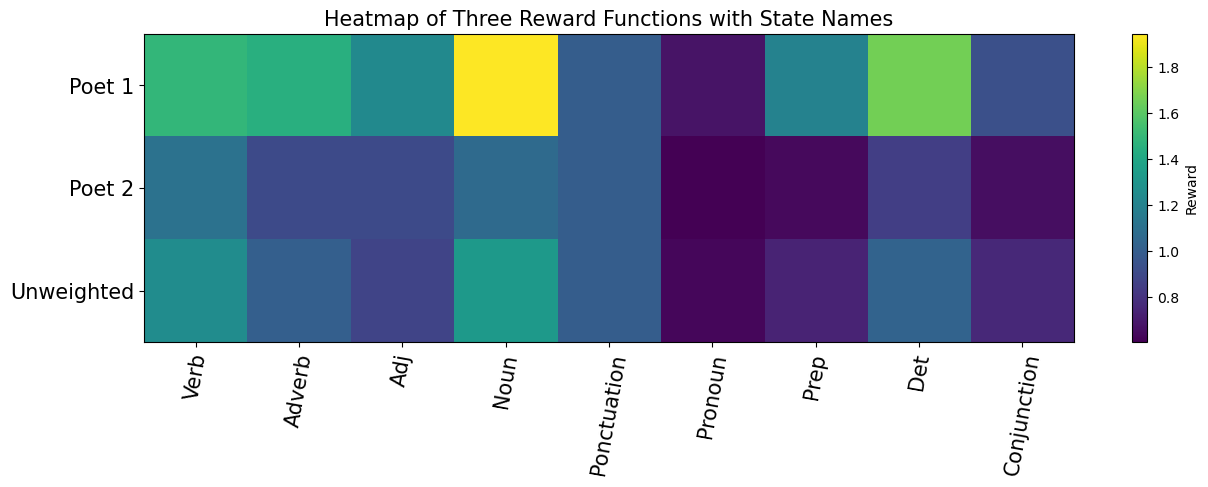

In [55]:
size_text = 15


# Example list of state names (replace with your actual list of state names)
state_names_ne = states_ne

rewards = np.array([reward_maxent_pos_ne, reward_maxent_neg_ne, reward_maxent_ne])


# Creating the heatmap
plt.figure(figsize=(15, 4))  # Adjusted figure size for better readability
plt.imshow(rewards, cmap='viridis', aspect='auto')
plt.colorbar(label='Reward')

# Adding labels and title
plt.title('Heatmap of Three Reward Functions with State Names', fontsize = size_text)
# plt.xlabel('States', fontsize = size_text)
# plt.ylabel('Reward Function', fontsize = size_text)
plt.yticks([0,1,2], ['Poet 1', 'Poet 2', 'Unweighted'], fontsize = size_text)
plt.xticks(np.arange(len(states_ne)), labels=state_names_ne, rotation=80, fontsize = size_text)  # Rotate for readability

plt.show()